# Second Harmonic Generation

For an electromagnetic wave in a nonlinear material, its behavior approximately follows the inhomogenious wave equation$^1$:
$$
\nabla^2 \vec{E} - \frac{n^2}{c^2}\frac{\partial^2}{\partial t^2}\vec{E} = \frac{1}{\epsilon_0 c^2}\frac{\partial^2}{\partial t^2}\vec{P}^{\mathrm{NL}}
$$

The nonlinear polarization will have a second-order term that depends on the square of the driving electric field:
$$\vec{P}^{\mathrm{NL},(2)} = \epsilon_0\chi^{(2)} \vec{E}_D^2$$

Suppose this electric field is a plane wave propagating along $z$ and has two frequencies $f_1$ and $f_2$:
$$E_D(z,t)=E_0\cos(kz-2\pi f_1 t) + E_0\cos(kz-2\pi f_2 t)$$
where $E_D(z,t)$ is the field strength along the polarization direction of $\vec{E}_D$.

The square of this electric field will be:
$$E_D^2(z,t) = E_0^2 \left( \cos^2(kz-2\pi f_1 t) + 2 E_0 \cos(kz - 2\pi f_1 t) \cos(kz - 2\pi f2 t) + \cos^2(kz- 2\pi f_2 t)\right)$$

If exponential notation was used, the equation equivalent to the one above can be easily written to show the various generated frequencies:
- Second harmonic generation of $f_1$
- Second harmonic generation of $f_2$
- Sum frequency generation of $f_1 + f_2$
- Difference frequency generation of $|f_1 - f_2|$

The second order part of the nonlinear polarization of the material will oscillate exactly in phase with square of the electric field at each location $z$ in which the material extends.  The plot below shows what this signal (along with its first and second derivatives) looks like at a given point in $z$.

References:
1. https://en.wikipedia.org/wiki/Nonlinear_optics#Wave_equation_in_a_nonlinear_material

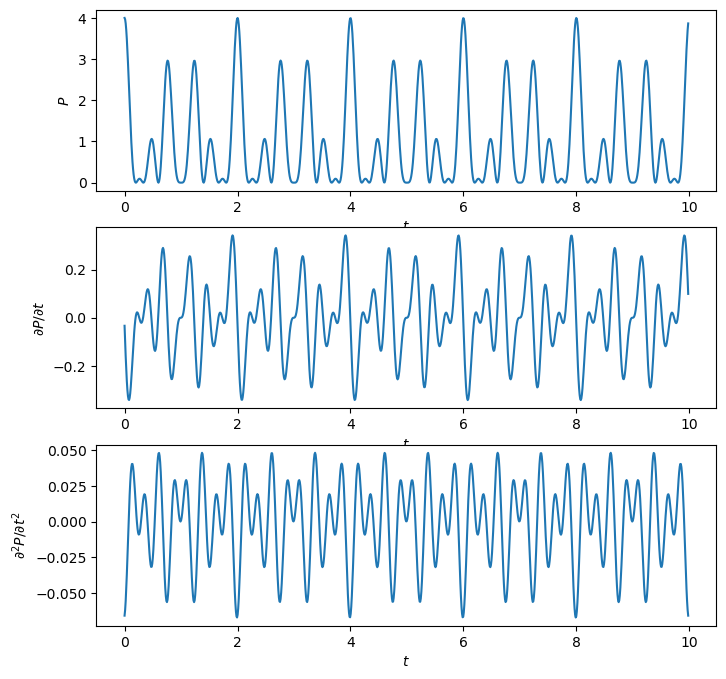

In [115]:
import numpy as np
from matplotlib import pyplot as plt
#from matplotlib import rcParams
#rcParams['text.usetex']=True

t = np.linspace(0,10,1000)
f1 = 0.5
f2 = 2
E = np.cos(f1*2*np.pi*t) + np.cos(f2*2*np.pi*t)
P = E**2
dP = np.diff(P)
d2P = np.diff(dP)

t = t[:-2]
P = P[:-2]
dP = dP[:-1]

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(t,P)
plt.xlabel('$t$')
plt.ylabel('$P$')
plt.subplot(3,1,2)
plt.plot(t,dP)
plt.xlabel('$t$')
plt.ylabel('$\partial P/\partial t$')
plt.subplot(3,1,3)
plt.plot(t,d2P)
plt.ylabel('$\partial^2 P/\partial t^2$')
plt.xlabel('$t$')
plt.show()

# Solution to Inhomogenius Wave Equation

The problem is now solving a inhomogenius wave equation along 1D space:
$$ \frac{\partial^2}{\partial z^2}E(z,t) - \frac{n^2}{c^2} \frac{\partial^2}{\partial t^2} E(z,t) = \frac{\chi^{(2)}}{c^2}\frac{\partial^2}{\partial t^2} E_D^2(z,t)$$
with the initial condition which we may take to be:
$$E(z,0)=0$$
since we are solving for the particular solution, and ignoring the driving field which is considered a transient wave.  Furthermore, we assume that the nonlinear material exists only at the point $z=0$ so that the nonlinear polarization is $0$ everywhere else.

Although there are faster approaches, we will take the straightforward approach and rewrite the differential equation as a difference equation:
$$
\frac{E(z+\Delta z,t) - 2E(z,t) + E(z-\Delta z,t)}{\Delta z^2} - \frac{n^2}{c^2}\frac{E(z,t+2\Delta t) - 2E(z,t+\Delta t) + E(z,t)}{\Delta t^2} = \frac{\chi^{(2)}}{c^2}\frac{E_D^2(0,t+2\Delta t) - 2E_D^2(0,t+\Delta t) + E_D^2(0,t)}{\Delta t^2}
$$

which can be rewritten as a recursion relationship:
\begin{align}
E(z,i\Delta t) =& -\frac{\chi^{(2)}}{n^2}\left( E_D^2(0,i\Delta t) - 2E_D^2(0,(i-1)\Delta t) + E_D^2(0,(i-2)\Delta t)\right) \\
&+ \frac{c^2\Delta t^2}{n^2 \Delta z^2}\left[E(z+\Delta z,(i-2)\Delta t) - 2E(z,(i-2)\Delta t) + E(z-\Delta z,(i-2)\Delta t) \right] \\
&+ 2E(z,(i-1)\Delta t) - E(z,(i-2)\Delta t)
\end{align}
where $i$ is an integer $\geq2$.  For $i=0$ and $i=1$, the following initial conditions hold:
$$E(z,t\leq\Delta t) = 0$$

The initial conditions simplify the expression for $i=2$ and $i=3$:
$$E(z,2\Delta t) = - \frac{\chi^{(2)}}{n^2}\left(E_D^2(0,2\Delta t) - 2E_D^2(0,\Delta t) + E_D^2(0,0) \right)$$
$$E(z,3\Delta t) = - \frac{\chi^{(2)}}{n^2}\left(E_D^2(0,3\Delta t) - 2E_D^2(0,2\Delta t) + E_D^2(0,\Delta t) \right) + 2E(z,2\Delta t)$$

At $i\geq4$ the terms containing the $\Delta z$ offsets will be nonzero:
$$\frac{c^2\Delta t^2}{n^2\Delta z^2}\left[E(z+\Delta z,(i-2)\Delta t) -2E(z, (i-2)\Delta t) + E(z-\Delta z,(i-2)\Delta t)\right]$$
This expression represents contributions to $E(z,i\Delta t)$ from $E(z+\Delta z,(i-2)\Delta t)$ and $E(z-\Delta t, (i-2)\Delta t)$.  In other words, information from the points $z+\Delta z$ and $z - \Delta z$ from time $(i-2)\Delta t$ has propagated to the point $z$ at time $i\Delta t$.  Note that in transitioning to difference equations, we have chosen to symmeterize the recursion terms associated with second partial derivative in $z$ whereas that for $t$ remains forward defining.

At the boundaries of the simulated $z$ space, we can take the value of $E$ outside to be $0$ for the purposes of calculation.  This will remain physically true until the wave from the nonlinear material arrives at the boundary.

In [118]:
Nz = 501
z = np.linspace(-20,20,Nz)
z0i = int((Nz-1)/2)
dz = z[1]-z[0]
dt = t[1]-t[0]
n = 1

In [ ]:
E = np.zeros([len(t),len(z)])
for i in range(len(t)):
    if i<2:
        E[i] = np.zeros(len(z)) 
    elif i==2:
        E[i][z0i] = P[i] - 2*P[i-1] + P[i-2]
    elif i==3:
        E[i][z0i] = P[i] - 2*P[i-1] + P[i-2] + 2*E[i-1][z0i]
    else:
        for j in range(len(z)):
            if j == 0:
                Eleft = 0
                Eright = E[i-2][j+1]
            elif j == len(z)-1:
                Eleft = E[i-2][j-1]
                Eright = 0
            else:
                Eleft = E[i-2][j-1]
                Eright = E[i-2][j+1]
            if j+1 < Nz and np.abs(z[j+1]) > t[i]:
                Eright = 0
            if j-1 >= 0 and np.abs(z[j-1]) > t[i]:
                Eleft = 0
            if j==z0i:
                E[i][z0i] = P[i] - 2*P[i-1] + P[i-2] + 2*E[i-1][j] - E[i-2][j] + dt**2/(n**2*dz**2)*(Eleft + Eright - 2*E[i-2][j])
            else:
                E[i][j] = 2*E[i-1][j] - E[i-2][j] + dt**2/(n**2*dz**2)*(Eleft + Eright - 2*E[i-2][j])

In [75]:
E = np.zeros([len(t),len(z)])
for i in range(len(t)):
    for j in range(len(z)):
        E[i][j] = (1/2)*np.sum(dP[t <= t[i] - np.abs(z[j])])*dt

In [ ]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

nz = len(z)
u_initial = np.exp(-nz**2)

diagonals = [[-2]*nz, [1]*(nz-1), [1]*(nz-1)]
A  =diags(diagonals, offsets=[0,-1,1],shape=(nz,nz)).toarray()

A[0,0] = A[-1,-1] = 1
A[0,1] = A[-1,-2] = 0

u = u_initial.copy()

for t in range(nt):
    b = u + 1.5**2 *dz**2/dt**2 * np.dot(A,u)

    u = spsolve(A,b)
    if t % 200 == 0:
        plt.plot(z,u,label=f't={t*dt:.3f}')
plt.legend()
plt.show()

C:\Users\Knight\AppData\Local\Temp\ipykernel_23944\881286692.py:18: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u = spsolve(A,b)


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


0.0


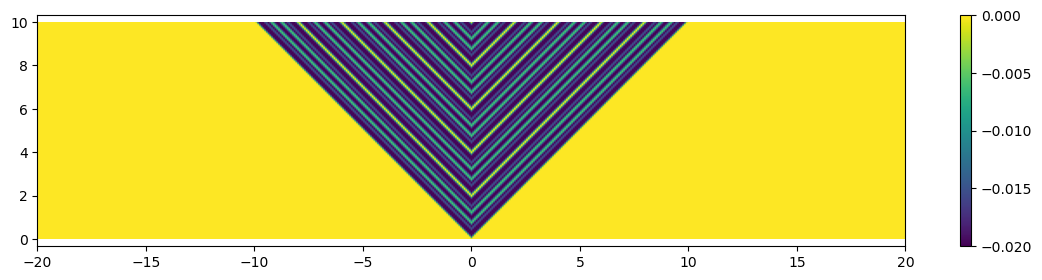

In [76]:
print(z[z0i])
plotextent = [min(z),max(z),max(t),min(t)]
plt.figure(figsize=(14,3))
plt.imshow(E,extent=plotextent)
plt.colorbar()
plt.axis('equal')
plt.ylim([min(t),max(t)])
plt.show()

In [66]:
import ipywidgets as widgets
from IPython.display import display

ti = widgets.IntSlider(min=0, max=len(t)-1)

def func_out(ti):
    plt.plot(z,E[ti,:])

out = widgets.interactive_output(func_out,{'ti':ti})

app = widgets.HBox([ti,out])

display(app)